<a href="https://colab.research.google.com/github/advaith017/HappinessReport/blob/main/HappinessReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings("ignore")

# Pulling Datasets 

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download unsdsn/world-happiness

world-happiness.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip world-happiness.zip -d dataset

Archive:  world-happiness.zip
replace dataset/2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
! pip install geopandas

## Cleaning Datasets

In [ ]:
df1 = pd.read_csv('../content/dataset/2017.csv')

In [ ]:
df1

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [ ]:
df1.isnull().sum() / df1.shape[0] * 100


Country                          0.0
Happiness.Rank                   0.0
Happiness.Score                  0.0
Whisker.high                     0.0
Whisker.low                      0.0
Economy..GDP.per.Capita.         0.0
Family                           0.0
Health..Life.Expectancy.         0.0
Freedom                          0.0
Generosity                       0.0
Trust..Government.Corruption.    0.0
Dystopia.Residual                0.0
dtype: float64

We have no null columns so dont have to replace any missing values.

In [ ]:
df1.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [ ]:
#Dropping whisker columns as they're not part of the factors that decide happiness score 
df1.drop('Whisker.high', inplace=True, axis=1)
df1.drop('Whisker.low', inplace=True, axis=1)

Dropping whisker columns as they're not part of the factors that decide happiness score 

In [ ]:
df1

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [ ]:
df1.nunique()

Country                          155
Happiness.Rank                   155
Happiness.Score                  151
Economy..GDP.per.Capita.         155
Family                           155
Health..Life.Expectancy.         155
Freedom                          155
Generosity                       155
Trust..Government.Corruption.    155
Dystopia.Residual                155
dtype: int64

This tells us that our dataset has no duplicate values.

In [ ]:
duplicate_rows_df = df1[df1.duplicated()]
print("number of duplicate rows:" , duplicate_rows_df.shape)

number of duplicate rows: (0, 10)


No duplicate rows, i.e. no repeated records.

In [ ]:
df_num = df1.select_dtypes(include = ['float64'])
df_num.head()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
happy_10 = df1[['Country', 'Happiness.Score']].head(10)

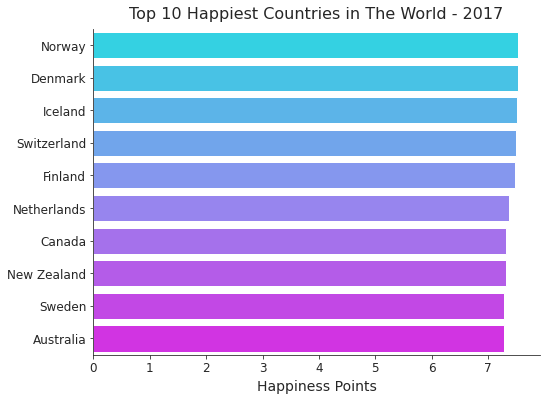

In [ ]:
pl.figure(figsize = (8,6)) # Set the figure width and height

# Bar chart showing top 20 countries with highest contribution of GDP per capita on Hapiness level
ax = sns.barplot(x='Happiness.Score', y='Country', data=happy_10, palette='cool')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
pl.title("Top 10 Happiest Countries in The World - 2017", fontsize = 16, pad=10)
ax.set_xlabel("Happiness Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
pl.show()

# **CONCLUSION**
Plot to visually represent the top 10 happiest countries.

In [ ]:
df2 = df1.drop(['Happiness.Rank','Happiness.Score', 'Dystopia.Residual'], axis = 1)

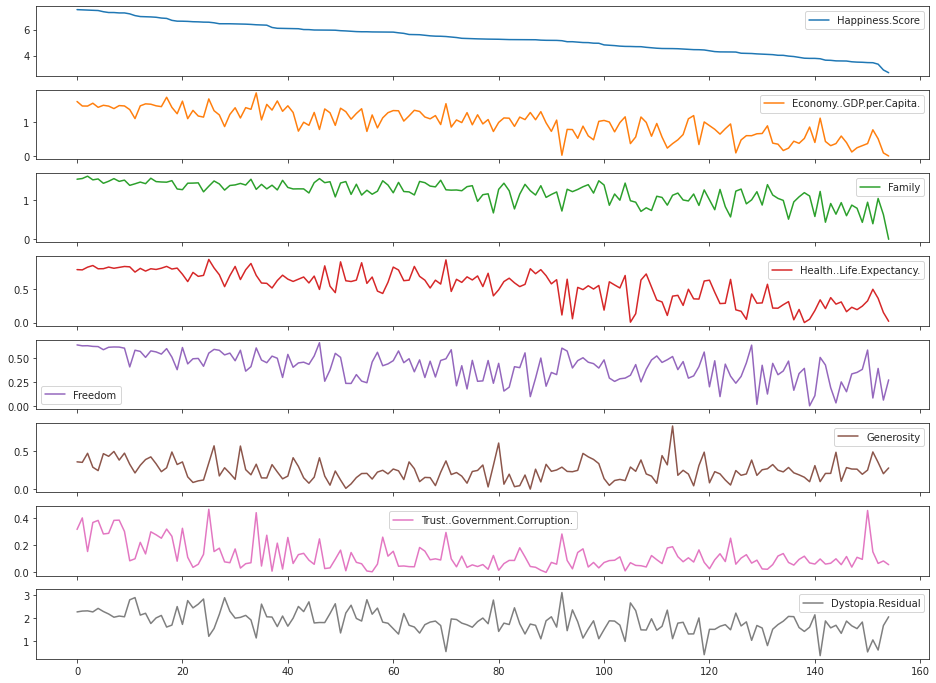

In [ ]:
df1.drop('Happiness.Rank',axis=1).plot(subplots=True, figsize=(16, 12));

# **CONCLUSION**
This graph represents how each column is related to the Happiness Rank.<br>
But this isn't enough to make clear cut inferences so we're going ahead with more analysis.

In [ ]:
df_melt = pd.melt(df2, id_vars=['Country'], 
                  value_vars=df2.columns, 
                  var_name='variable', 
                  value_name='point')

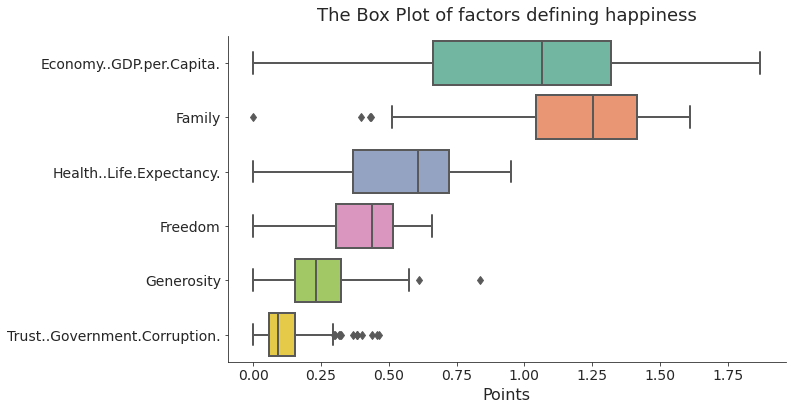

In [ ]:
# Set the figure width and height
pl.figure(figsize = (10,6))

# Plot the heatmap of correlation between variables in the dataframe
ax = sns.boxplot(x='point', y='variable', data=df_melt, linewidth=2, fliersize=6, palette='Set2')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
pl.title('The Box Plot of factors defining happiness', fontsize = 18, pad=15)
ax.tick_params(labelsize=14)
ax.set_xlabel("Points", fontsize=16, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=14)

pl.show()

# **Conclusion**
According to the box plot:
<br>1. Economy,GDP per capita has a median of 1.10 and no outliers.
<br>2. Family has a median of 1.30 and has 3 outliers.
<br>3. Health and life expectancy has a median of 0.65 and no outliers.
<br>4. Freedom has a median of 0.40 and no outliers.
<br>5. Generosity has a median of 0.20 and has 2 outliers.
<br>6. Trust,Government,corruption has a median of 0.10 and has more than 5 outliers.

In [ ]:
c = df1.corr()

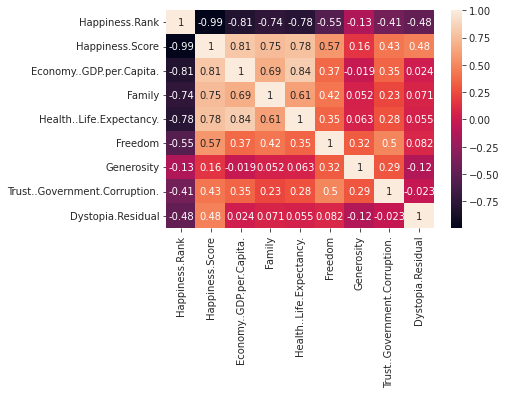

In [ ]:
sns.heatmap(c, xticklabels = c.columns, yticklabels = c.columns, annot = True)

# **Conclusion**


*   Highest correlation between happiness score and Economy GDP per capita. 
*   Lowest correlation between happiness score and generosity



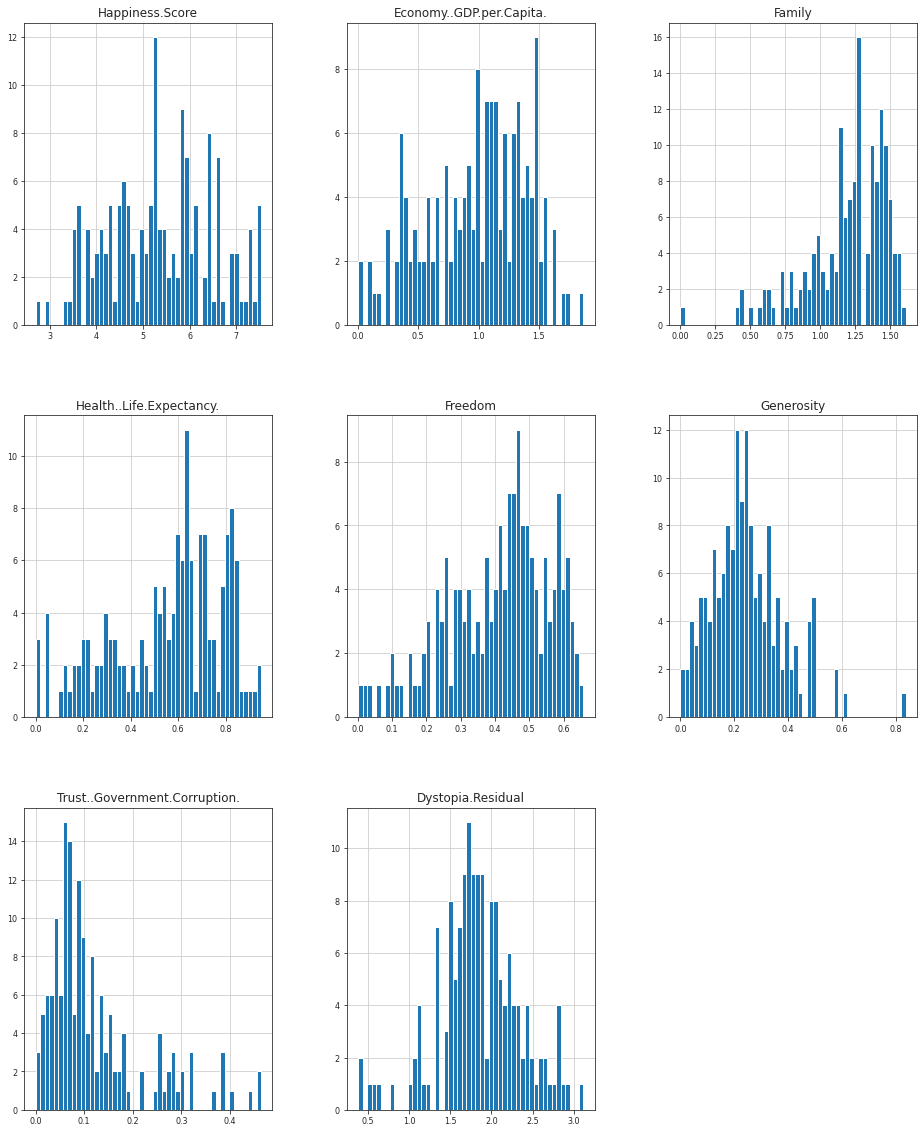

In [ ]:

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# **Conclusions From Histograms**<br>

*We get the average scores of all the factors from the above histograms<br>*

Happiness Score - 5.2 <br>
Economy - 1.49<br>
Family - 1.25(Rightly skewed which means that families play a significant role in people's happiness in almost EVERY country)
Health Life Expectancy - 0.625<br>
Freedom - .47<br>
Generosity - 0.3 (Symmetric around 0.3 and not much above 0.5 which means it plays little importance)<br>
Trust and Government - 0.08 (Least affecting factor,Left Skewed ) <br>
Residual - 1.75( Which means each country has its own unique factor that plays a significant contribution in their citizen's happiness)



In [ ]:
 l = []
df2 = df1.drop(['Country','Happiness.Rank','Happiness.Score', 'Dystopia.Residual'], axis = 1)
x=df2.mean(axis='index')
y=df2.max(axis='index')
for i in range(len(x)):
  l.append(x[i]/y[i])
print(l)

[0.5263717467649982, 0.7381826263567933, 0.5806689822474644, 0.6210205897376871, 0.2945839264915277, 0.2651694083534826]


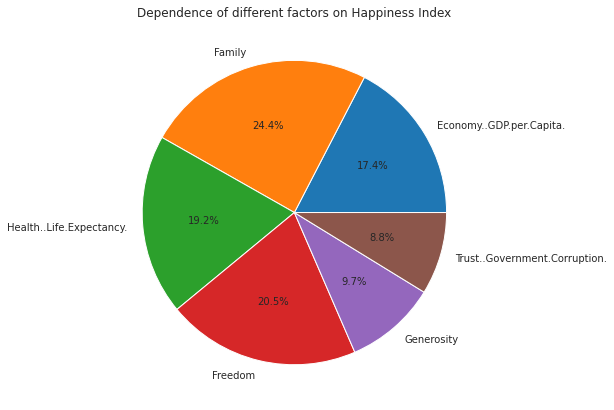

In [ ]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
    
fig = pl.figure(figsize =(10, 7))
pl.pie(l, autopct = lambda pct: func(pct, l), labels = df2.columns)
pl.title("Dependence of different factors on Happiness Index")
pl.show() 

# **CONCLUSION**
This pie chart tells us that in 2017, Family was the biggest deciding factor of the Happiness Index of the specific country followed by Freedom and Trust in Government is the least deciding factor.

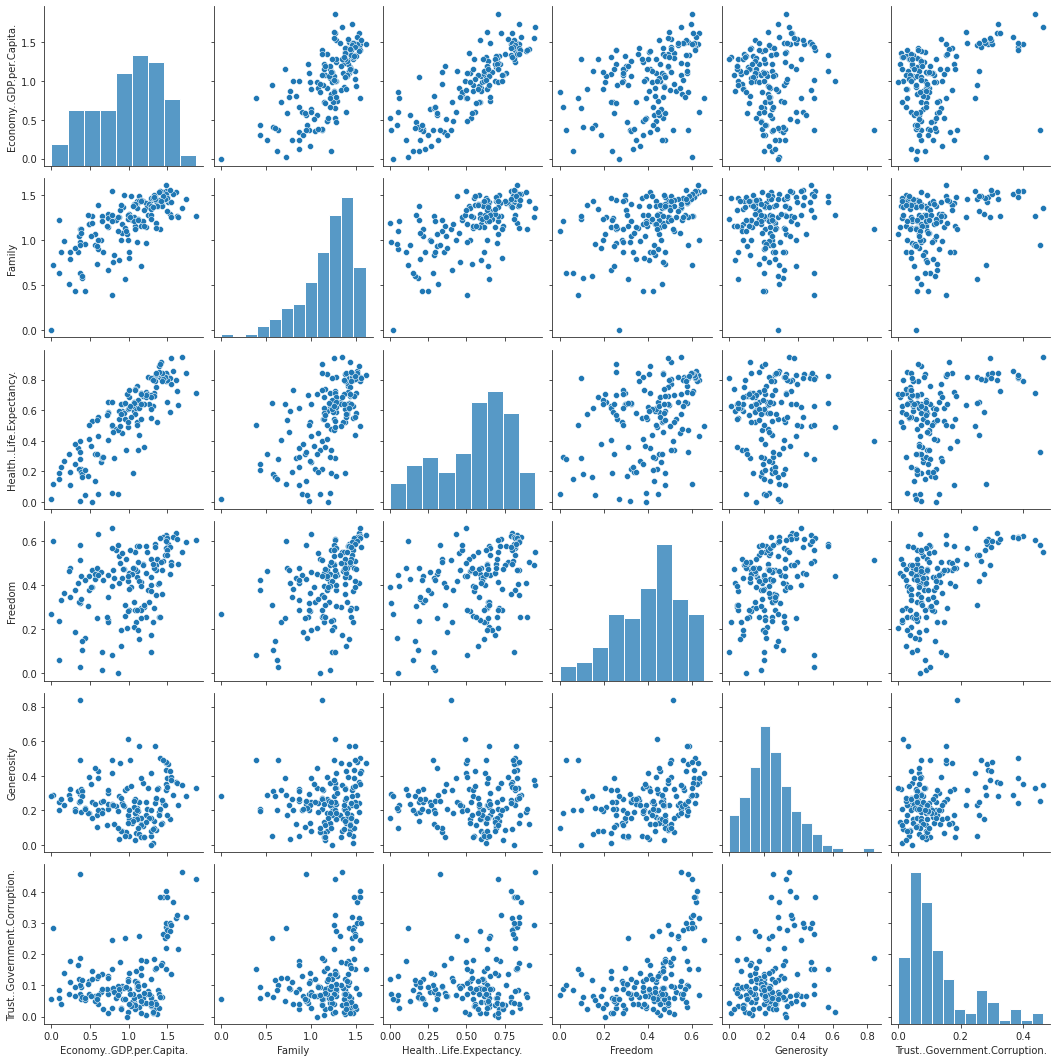

In [ ]:
sns.pairplot(df2)

# **CONCLUSION**
Plotted this to just get a clear idea of dependencies between pair of columns.

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px

fig = px.choropleth(df1, locations='Country',
                    locationmode = "country names",
                    color="Happiness.Score",
                    hover_name = 'Country',
                    hover_data={'Country':False,
                                'Happiness.Rank': True
                               }
                   )
fig.update_layout(width=900, height=400, margin={"r":0,"t":0,"l":0,"b":0})
fig.show(renderer="colab")

# **CONCLUSION**
This country map tells us that the people in nordic countries and North America are happy compared to the rest of the world.<br>
Also, the people in Africa and South Asia are the countries with lower Happiness Scores which may have to do with poverty, education, infrastructure, etc.

# **ROUND 2 ANALYSIS**

In [ ]:
df4 = pd.read_csv('../content/dataset/2016.csv')

# Cleaning dataset 2016.csv for round 2

In [ ]:
df4.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [ ]:
df4.isnull().sum() / df4.shape[0] * 100

Country                          0.0
Region                           0.0
Happiness Rank                   0.0
Happiness Score                  0.0
Lower Confidence Interval        0.0
Upper Confidence Interval        0.0
Economy (GDP per Capita)         0.0
Family                           0.0
Health (Life Expectancy)         0.0
Freedom                          0.0
Trust (Government Corruption)    0.0
Generosity                       0.0
Dystopia Residual                0.0
dtype: float64

In [ ]:
df4.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [ ]:
#Dropping confidence interval columns as they're not part of the factors that decide happiness score 
df4.drop('Lower Confidence Interval', inplace=True, axis=1)
df4.drop('Upper Confidence Interval', inplace=True, axis=1)

Dropping confidence interval columns as they're not part of the factors that decide happiness score 

In [ ]:
df4.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
df4.nunique()

Country                          157
Region                            10
Happiness Rank                   154
Happiness Score                  154
Economy (GDP per Capita)         157
Family                           157
Health (Life Expectancy)         156
Freedom                          157
Trust (Government Corruption)    156
Generosity                       157
Dystopia Residual                157
dtype: int64

In [ ]:
duplicate_rows_df = df4[df4.duplicated()]
print("number of duplicate rows:" , duplicate_rows_df.shape)

number of duplicate rows: (0, 11)


Mean: Economy..GDP.per.Capita.        -9.454803e-17
Family                          -5.672882e-16
Health..Life.Expectancy.        -3.266205e-16
Freedom                         -9.454803e-17
Generosity                       1.941100e-16
Trust..Government.Corruption.   -2.865092e-17
dtype: float64
Std: Economy..GDP.per.Capita.         1.0
Family                           1.0
Health..Life.Expectancy.         1.0
Freedom                          1.0
Generosity                       1.0
Trust..Government.Corruption.    1.0
dtype: float64
(6, 6)


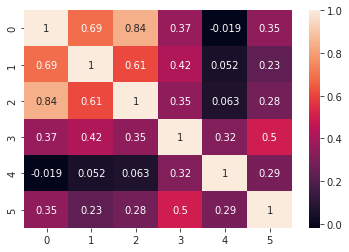

In [ ]:
#COVARIANCE MATRIX
def standardize_data(X):
    numerator = X - np.mean(X, axis=0)
    denominator = np.std(X, axis=0)
    return numerator / denominator

X_scl = standardize_data(df2)

print('Mean:', np.mean(X_scl))
print('Std:', np.std(X_scl))
def get_covariance_matrix(X, ddof=0):
    n_samples = X.shape[0]
    C = np.dot(X.T, X) / (n_samples - ddof)
    return C

C = get_covariance_matrix(X_scl, ddof=0)

print(C.shape)
sns.heatmap(C, annot=True, fmt='.2g')
pl.show()


# **CONCLUSION**
Either the covariance between x and y is : 

Covariance(x,y) > 0 : this means that they are positively related 

Covariance(x,y) < 0 : this means that x and y are negatively  related 

if Covariance(x,y) = 0 : then x and y are independent of each other.

In [ ]:
df5 = df4.drop(['Country', 'Region', 'Happiness Rank','Happiness Score','Dystopia Residual'], axis = 1)
df6 = df4.drop(['Country', 'Region', 'Happiness Rank'], axis = 1)

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
#Before we do PCA, we have to centre and scale the data
scaled_data = preprocessing.scale(df5.T)
#.T to take transpose as scale expects rows and not columns

In [ ]:
pca = PCA()
pca.fit(scaled_data)
#To generate coordinates for a PCA graph
pca_data = pca.transform(scaled_data)

In [ ]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

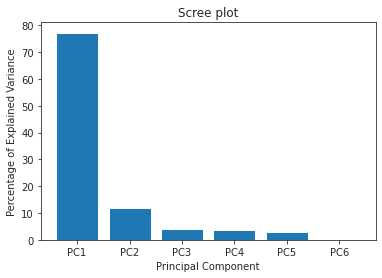

In [ ]:
pl.bar(x = range(1, len(per_var) +1 ), height=per_var, tick_label=labels)
pl.ylabel('Percentage of Explained Variance')
pl.xlabel('Principal Component')
pl.title('Scree plot')
pl.show()

# Almost all of the variance is along the first PC, so a 2-D graph should do a good job representing the original data.

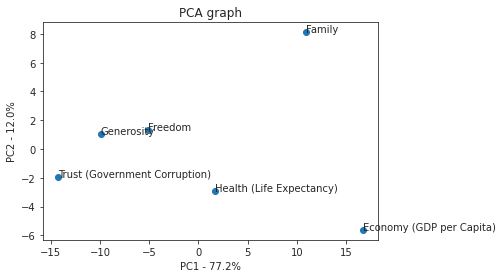

In [ ]:
pca_df = pd.DataFrame(pca_data, index = df5.columns, columns = labels)
pl.scatter(pca_df.PC1, pca_df.PC2)
pl.title('PCA graph')
pl.xlabel('PC1 - {0}%'.format(per_var[0]))
pl.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
  pl.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

pl.show()

# **CONCLUSION**
The columns clustered on the left side like Trust on Government, Generosity, Freedom are correlated with each other.<br>
The columns clustered on the right side like Economy and Family are correlated with each other. <br>
Health and life expectancy centre in the graph suggests that it is equally correlated to the columns on either of sides.<br>
Seperation of left and right columns alonf x-axis suggest they're different from one another.

In [ ]:
df6.columns

Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
#This part worked during Round 2 review and was liked by the mentors too, Don't know why it's not working now
loading_scores = pd.Series(pca.components_[0], index = df6.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
top_10 = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10])

ValueError: ignored

# **CONCLUSION**
Every column is negatively related to Happiness Rank as it should be as all the values for factors increases, then, the Happiness Score increases and consequently the Happiness Rank should decrease.

# **ROUND 3 ANALYSIS**

In [ ]:
#loading datasets

df2=pd.read_csv("../content/dataset/2016.csv")
df3=pd.read_csv("../content/dataset/2017.csv")
df4=pd.read_csv("../content/dataset/2018.csv")
df5=pd.read_csv("../content/dataset/2019.csv")

In [ ]:
#checking for columns
print(df2.columns,'\n',df3.columns,'\n',df4.columns,'\n',df5.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 
 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 
 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object') 
 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Ge

In [ ]:
df2.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
df3.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
df4.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
df5.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
columns_2=['Country','Region', 'Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']
df2_new=df2.drop(['Happiness Rank','Lower Confidence Interval', 'Upper Confidence Interval'],axis=1)

In [ ]:
new_columns_16=['country','region','happiness score','GDP_16','family/social_support_16','life_expectancy_16','freedom_to_make_choices_16','perception_of_corruption_16','generosity_16','residual_16']

In [ ]:
df2_new.rename(columns=dict(zip(columns_2,new_columns_16)),inplace=True)

In [ ]:
df2_new.head(2)

,country,region,happiness score,GDP_16,family/social_support_16,life_expectancy_16,freedom_to_make_choices_16,perception_of_corruption_16,generosity_16,residual_16
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [ ]:
columns_3=['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom','Trust..Government.Corruption.',
            'Generosity','Dystopia.Residual']
df3_new=df3.drop([  'Happiness.Rank','Whisker.high','Whisker.low', ],axis=1)
new_columns_17=['country','happiness score','GDP_17','family/social_support_17','life_expectancy_17','freedom_to_make_choices_17','perception_of_corruption_17','generosity_17','residual_17']
df3_new.rename(columns=dict(zip(columns_3,new_columns_17)),inplace=True)

In [ ]:
df3_new.head()

,country,happiness score,GDP_17,family/social_support_17,life_expectancy_17,freedom_to_make_choices_17,generosity_17,perception_of_corruption_17,residual_17
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
#I will rename and drop columns for df4 and df5
columns_4=['Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption','residual']
df4_new=df4.drop(['Overall rank'],axis=1)
new_columns_18=['country','happiness score','GDP_18','family/social_support_18','life_expectancy_18','freedom_to_make_choices_18','perception_of_corruption_18','generosity_18','residual_18']
df4_new.rename(columns=dict(zip(columns_4,new_columns_18)),inplace=True)

In [ ]:
df4_new.head()

,country,happiness score,GDP_18,family/social_support_18,life_expectancy_18,freedom_to_make_choices_18,perception_of_corruption_18,generosity_18
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
columns_5=['Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption','residual']
df5_new=df5.drop([  'Overall rank' ],axis=1)
new_columns_19=['country','happiness score','GDP_19','family/social_support_19','life_expectancy_19','freedom_to_make_choices_19','perception_of_corruption_19','generosity_19','residual_19']
df5_new.rename(columns=dict(zip(columns_5,new_columns_19)),inplace=True)

In [ ]:
df5_new.head(2)

,country,happiness score,GDP_19,family/social_support_19,life_expectancy_19,freedom_to_make_choices_19,perception_of_corruption_19,generosity_19
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [ ]:
print(df2_new.info(),'\\n',df3_new.info(),
      '\\n',df4_new.info(),'\\n',df5_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      157 non-null    object 
 1   region                       157 non-null    object 
 2   happiness score              157 non-null    float64
 3   GDP_16                       157 non-null    float64
 4   family/social_support_16     157 non-null    float64
 5   life_expectancy_16           157 non-null    float64
 6   freedom_to_make_choices_16   157 non-null    float64
 7   perception_of_corruption_16  157 non-null    float64
 8   generosity_16                157 non-null    float64
 9   residual_16                  157 non-null    float64
dtypes: float64(8), object(2)
memory usage: 12.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column                       Non-Null

In [ ]:
n=0
for country in df2_new['country'].unique() :
    if country not in df3_new['country'].unique():
        n+=1
        print( country,False)
print(f'\n{n} countries are not in df3_new')

Puerto Rico False
Taiwan False
Suriname False
Hong Kong False
Somaliland Region False
Laos False
Comoros False

7 countries are not in df3_new


In [ ]:
#now the vice versa
n=0
for country in df3_new['country'].unique() :
    if country not in df2_new['country'].unique():
        n+=1
        print( country,False)
print(f'\n{n} countries are not in df2_new')

Taiwan Province of China False
Hong Kong S.A.R., China False
Mozambique False
Lesotho False
Central African Republic False

5 countries are not in df2_new


In [ ]:
#dropping countries that are in df3_new but not in the df2_new
to_drop=['Puerto Rico','Suriname','Laos','Swaziland','Djibouti','Comoros','Somaliland region']
for name in to_drop:
    df2_new.drop( df2_new[ df2_new['country'] == name ].index , inplace=True)

In [ ]:
len(df2_new)

153

In [ ]:
#dropping countries that are in df2_new but not in the df3_new
to_drop1=['Mozambique','Lesotho','Central African Republic']
for name in to_drop1:
    df3_new.drop( df3_new[ df3_new['country'] == name ].index , inplace=True)

In [ ]:
len(df3_new)

152

In [ ]:
df3_new=df3_new.replace(['Taiwan Province of China','Hong Kong S.A.R., China'],['Taiwan','Hong Kong'])

In [ ]:
n=0
for country in df2_new['country'].unique() :
    if country not in df4_new['country'].unique():
        n+=1
        print( country,False)
print(f'\n{n} countries are not in df4_new')

Trinidad and Tobago False
North Cyprus False
Somaliland Region False

3 countries are not in df4_new


In [ ]:
n=0
for country in df4_new['country'].unique() :
    if country not in df2_new['country'].unique():
        n+=1
        print( country,False)
print(f'\n{n} countries are not in df2_new')

Trinidad & Tobago False
Northern Cyprus False
Laos False
Mozambique False
Lesotho False
Central African Republic False

6 countries are not in df2_new


In [ ]:
#dropping countries that are in df4_new but not in the df2_new (and therefore not in df3_new)
to_drop2=['Somaliland Region']
for name in to_drop2:
    df2_new.drop( df2_new[ df2_new['country'] == name ].index , inplace=True)
    df4_new.drop( df4_new[ df4_new['country'] == name ].index , inplace=True)

In [ ]:
#dropping countries that are in df2_new but not in the df4_new 
to_drop3=['Laos','Mozambique', 'Lesotho', 'Central African Republic']
for name in to_drop3:
    df4_new.drop( df4_new[ df4_new['country'] == name ].index , inplace=True)

In [ ]:
print(len(df2_new),len(df3_new),len(df4_new))

152 152 152


In [ ]:
n=0
for country in df2_new['country'].unique() :
    if country not in df5_new['country'].unique():
        n+=1
        print( country,False)
print(f'\n{n} countries are not in df5_new')

Trinidad and Tobago False
Belize False
North Cyprus False
Macedonia False
Sudan False
Angola False

6 countries are not in df5_new


In [ ]:
n=0
for country in df5_new['country'].unique() :
    if country not in df2_new['country'].unique():
        n+=1
        print( country,False)
print(f'\n{n} countries are not in df2_new')

Trinidad & Tobago False
Northern Cyprus False
North Macedonia False
Laos False
Gambia False
Mozambique False
Swaziland False
Comoros False
Lesotho False
Central African Republic False

10 countries are not in df2_new


In [ ]:
#renaming countries
df5_new=df5_new.replace(['Trinidad & Tobago','Northern Cyprus','North Macedonia'],
                  ['Trinidad and Tobago','North Cyprus','Macedonia'])

In [ ]:
#dropping countries that are in df1_new but not in the df5_new
to_drop5=['Laos','Gambia','Mozambique','Swaziland','Comoros','Lesotho','Central Africa Republic']
for name in to_drop5:
    df5_new.drop( df5_new[ df5_new['country'] == name ].index , inplace=True)

In [ ]:
#dropping countries that are in df5_nwe but not in the other datasets
to_drop6=['Sudan','Angola']
data_frames=[df2_new,df3_new,df4_new]
for name in to_drop6:
    for frame in data_frames:
        frame.drop( frame[ frame['country'] == name ].index , inplace=True)

In [ ]:
print(len(df2_new),len(df3_new),len(df4_new),len(df5_new))

150 150 150 150


In [ ]:
df2_new=df2_new.sort_values('country')
df3_new=df3_new.sort_values('country')
df4_new=df4_new.sort_values('country')
df5_new=df5_new.sort_values('country')

In [ ]:
df2_new['country'].unique()==df3_new['country'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
df2_new['country'].unique()==df4_new['country'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
frames=[df2_new,df3_new,df4_new]
for frame in frames:
    frame=frame.reset_index(drop=True,inplace=True)

In [ ]:
df3_new['region']=df2_new['region']
new_col=['country','region','happiness score','GDP_17','family/social_support_17','life_expectancy_17','freedom_to_make_choices_17','perception_of_corruption_17','generosity_17','residual_17']
df3_new=df3_new[new_col]

In [ ]:
df2_new.head()

,country,region,happiness score,GDP_16,family/social_support_16,life_expectancy_16,freedom_to_make_choices_16,perception_of_corruption_16,generosity_16,residual_16
0,Afghanistan,Southern Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Central and Eastern Europe,4.655,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Middle East and Northern Africa,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Argentina,Latin America and Caribbean,6.650,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
4,Armenia,Central and Eastern Europe,4.360,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864


Now, we merge the dataframes to get a new dataframe

In [ ]:
from functools import reduce
dfs = [df2_new, df3_new, df4_new]
df_final = reduce(lambda left,right: pd.merge(left,right,on='country'), dfs)

In [ ]:
df_final.head()

,country,region_x,happiness score_x,GDP_16,family/social_support_16,life_expectancy_16,freedom_to_make_choices_16,perception_of_corruption_16,generosity_16,residual_16,...,perception_of_corruption_17,generosity_17,residual_17,happiness score,GDP_18,family/social_support_18,life_expectancy_18,freedom_to_make_choices_18,perception_of_corruption_18,generosity_18
0,Afghanistan,Southern Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,...,0.061158,0.311871,2.150801,3.632,0.332,0.537,0.255,0.085,0.191,0.036
1,Albania,Central and Eastern Europe,4.655,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816,...,0.039864,0.201313,1.490442,4.586,0.916,0.817,0.790,0.419,0.149,0.032
2,Algeria,Middle East and Northern Africa,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,...,0.146096,0.069437,2.567604,5.295,0.979,1.154,0.687,0.077,0.055,0.135
3,Argentina,Latin America and Caribbean,6.650,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985,...,0.059740,0.109457,2.614005,6.388,1.073,1.468,0.744,0.570,0.062,0.054
4,Armenia,Central and Eastern Europe,4.360,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864,...,0.026674,0.083488,1.521499,4.321,0.816,0.990,0.666,0.260,0.077,0.028


In [ ]:
df_final.columns

Index(['country', 'region_x', 'happiness score_x', 'GDP_16',
       'family/social_support_16', 'life_expectancy_16',
       'freedom_to_make_choices_16', 'perception_of_corruption_16',
       'generosity_16', 'residual_16', 'region_y', 'happiness score_y',
       'GDP_17', 'family/social_support_17', 'life_expectancy_17',
       'freedom_to_make_choices_17', 'perception_of_corruption_17',
       'generosity_17', 'residual_17', 'happiness score', 'GDP_18',
       'family/social_support_18', 'life_expectancy_18',
       'freedom_to_make_choices_18', 'perception_of_corruption_18',
       'generosity_18'],
      dtype='object')

In [ ]:
df_final = df_final.drop(['region_x','region_y'],axis=1)

In [ ]:
df_final.columns

Index(['country', 'happiness score_x', 'GDP_16', 'family/social_support_16',
       'life_expectancy_16', 'freedom_to_make_choices_16',
       'perception_of_corruption_16', 'generosity_16', 'residual_16',
       'happiness score_y', 'GDP_17', 'family/social_support_17',
       'life_expectancy_17', 'freedom_to_make_choices_17',
       'perception_of_corruption_17', 'generosity_17', 'residual_17',
       'happiness score', 'GDP_18', 'family/social_support_18',
       'life_expectancy_18', 'freedom_to_make_choices_18',
       'perception_of_corruption_18', 'generosity_18'],
      dtype='object')

In [ ]:
df = df_final[['country']]

Getting mean of values from years 2016 through 2018 and adding them to final merged dataframe

In [ ]:
#Getting average of values from years 2016 through 2018 and adding them to final merged dataframe
from numpy.ma.core import mean
df['Happiness Score'] = df_final[['happiness score_x','happiness score_y','happiness score']].mean(axis=1)
df['GDP'] = df_final[['GDP_16','GDP_17','GDP_18']].mean(axis=1)
df['family/social_support'] = df_final[['family/social_support_16','family/social_support_17','family/social_support_18']].mean(axis=1)
df['life_expectancy'] = df_final[['life_expectancy_16','life_expectancy_17','life_expectancy_18']].mean(axis=1)
df['freedom_to_make_choices'] = df_final[['freedom_to_make_choices_16','freedom_to_make_choices_17','freedom_to_make_choices_18']].mean(axis=1)
df['perception_of_corruption'] = df_final[['perception_of_corruption_16','perception_of_corruption_17','perception_of_corruption_18']].mean(axis=1)
df['generosity'] = df_final[['generosity_16','generosity_17','generosity_18']].mean(axis=1)

In [ ]:
cols = ['country', 'GDP', 'Happiness Score', 'family/social_support',
       'life_expectancy', 'freedom_to_make_choices',
       'perception_of_corruption', 'generosity']

cols = cols[-1:] + cols[:-1]

In [ ]:
df.head(10)

,country,Happiness Score,GDP,family/social_support,life_expectancy,freedom_to_make_choices,perception_of_corruption,generosity
0,Afghanistan,3.595333,0.371916,0.409638,0.203062,0.118493,0.107759,0.220184
1,Albania,4.628333,0.955831,0.707438,0.750410,0.373053,0.080625,0.133904
2,Algeria,5.840667,1.041175,1.044436,0.640875,0.173465,0.120889,0.091626
3,Argentina,6.545667,1.136555,1.324857,0.712082,0.495786,0.064900,0.091116
4,Armenia,4.352333,0.859152,0.874085,0.648118,0.199558,0.046611,0.063139
5,Australia,7.289667,1.422948,1.395934,0.868362,0.605659,0.328498,0.417923
6,Austria,7.088000,1.426159,1.349258,0.837326,0.576105,0.225513,0.289707
7,Azerbaijan,5.242000,1.100444,1.024607,0.562939,0.393809,0.130376,0.092556
8,Bahrain,6.136667,1.422217,1.211027,0.669364,0.534832,0.252587,0.155713
9,Bangladesh,4.583667,0.553484,0.610874,0.547377,0.485379,0.134183,0.169192


In [ ]:
df.columns

Index(['country', 'Happiness Score', 'GDP', 'family/social_support',
       'life_expectancy', 'freedom_to_make_choices',
       'perception_of_corruption', 'generosity'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   148 non-null    object 
 1   Happiness Score           148 non-null    float64
 2   GDP                       148 non-null    float64
 3   family/social_support     148 non-null    float64
 4   life_expectancy           148 non-null    float64
 5   freedom_to_make_choices   148 non-null    float64
 6   perception_of_corruption  148 non-null    float64
 7   generosity                148 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.4+ KB


# QUESTION 1

In [ ]:
from sklearn import linear_model
X = df.iloc[:,2:8]
y = df.iloc[:,1]

regr = linear_model.LinearRegression()
regr.fit(X, y)


LinearRegression()

In [ ]:
df5_new.head()

,country,happiness score,GDP_19,family/social_support_19,life_expectancy_19,freedom_to_make_choices_19,perception_of_corruption_19,generosity_19
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
106,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
87,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114
46,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050
115,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [ ]:
predicted_HI = regr.predict([df5_new.iloc[0,2:8]])
print(predicted_HI)

[3.4469735]


# **CONCLUSION**
Happpiness index predicted for the first row (Afghanistan) in the 2019 dataset is close to the given value of happiness index.

Our accuracy came out to be about 85%

# QUESTION 2

Making Use of Stacked Column Charts to jot gdp and trust to find out which countries have a high happiness index from these two factors.
Also we are splitting the dataset into smaller subsets to have a better visualisation.<br>
We are splitting 150 countries into 3 subsets of 50 countries each and then finding top 5 in each subset and plotting them against each other to get final top 5 countries.

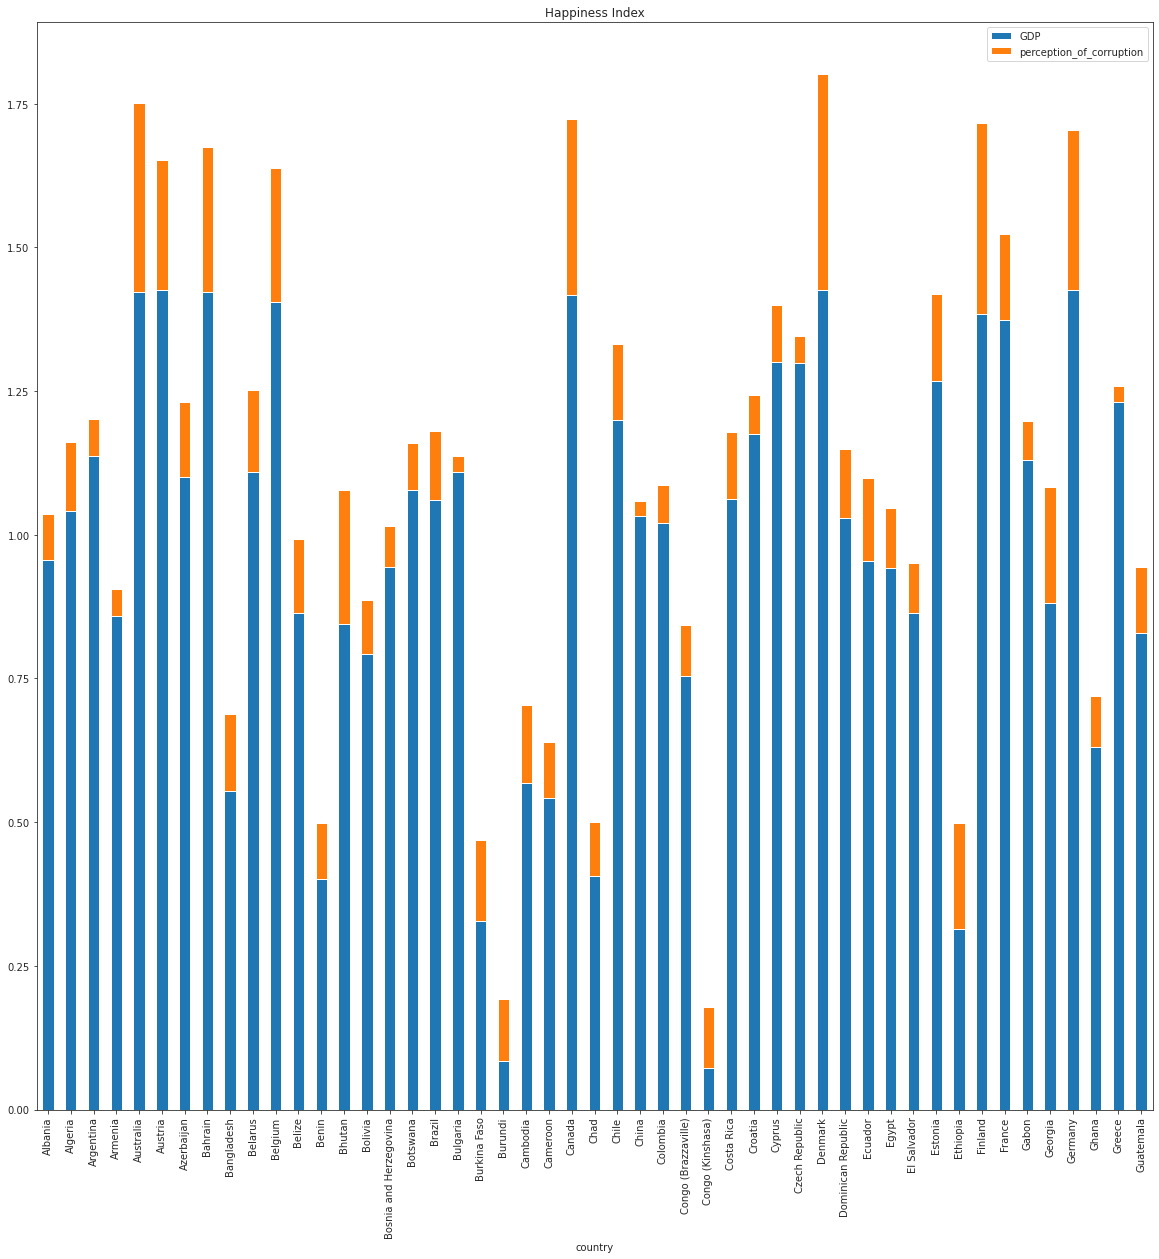

In [ ]:
dff = df.iloc[1:50,[0,2,6]]

dff.plot.bar(x='country', stacked=True, title='Happiness Index', figsize=(20,20))
#denmark,australia,canada,finland,germany

TOP 5 = denmark, australia, canada, finland, germany

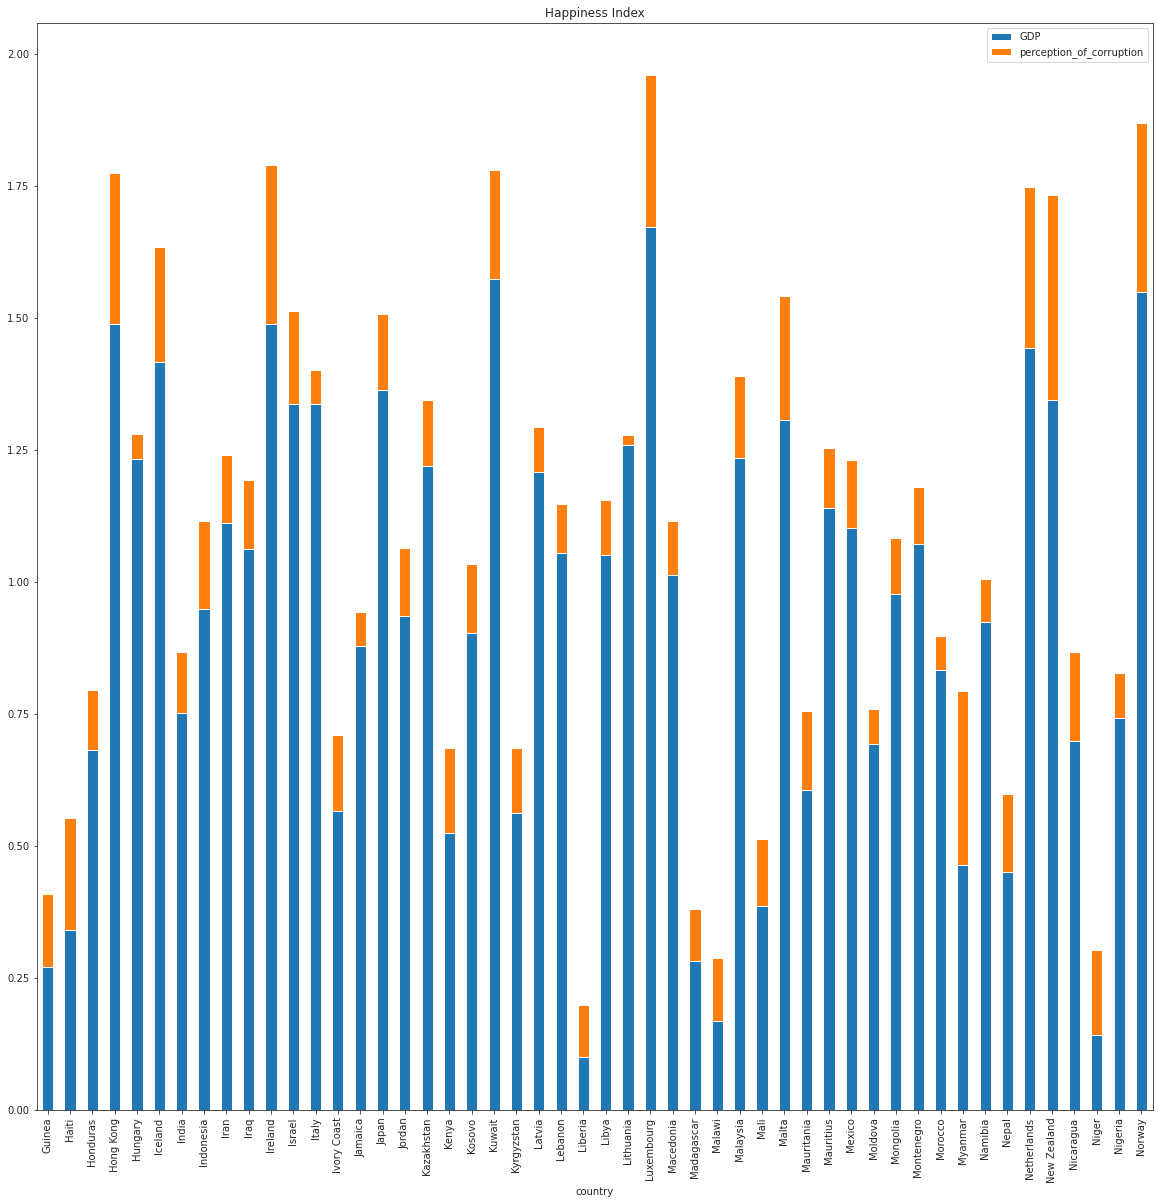

In [ ]:
dff = df.iloc[50:100,[0,2,6]]

dff.plot.bar(x='country', stacked=True, title='Happiness Index', figsize=(20,20))
#luxembourg,Norway,Ireland,Hong Kong,Kuwait

TOP 5 = luxembourg, Norway, Ireland, Hong Kong, Kuwait

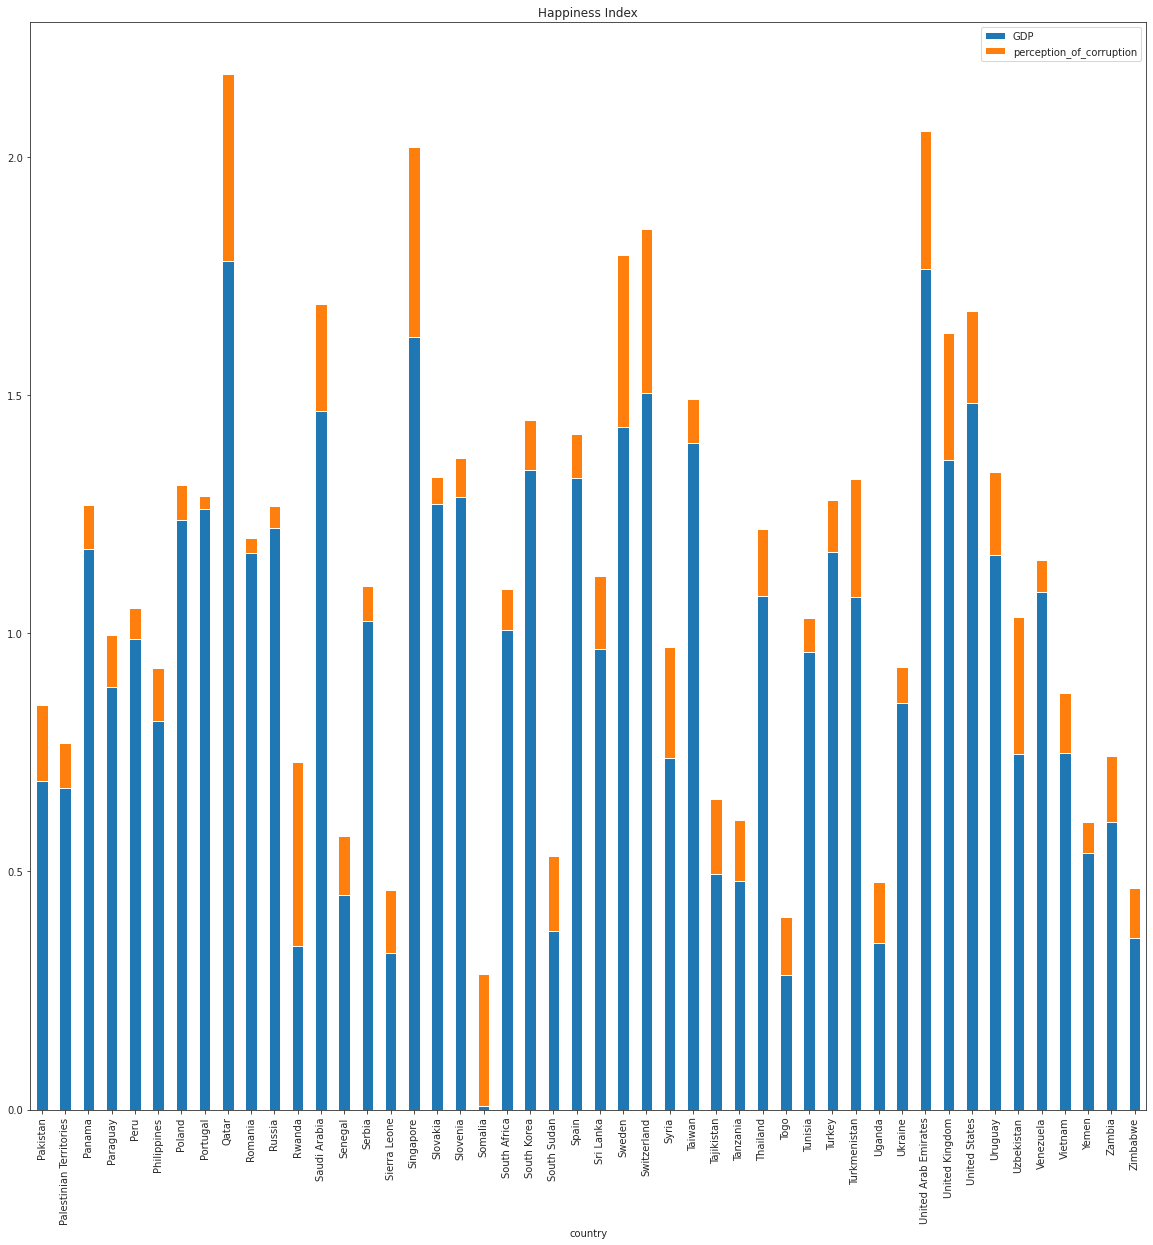

In [ ]:
dff = df.iloc[100:,[0,2,6]]

dff.plot.bar(x='country', stacked=True, title='Happiness Index', figsize=(20,20))
#Qatar,Singapore,UK,Switz,Sweden

TOP 5 = Qatar, Singapore, UK, Switz, Sweden

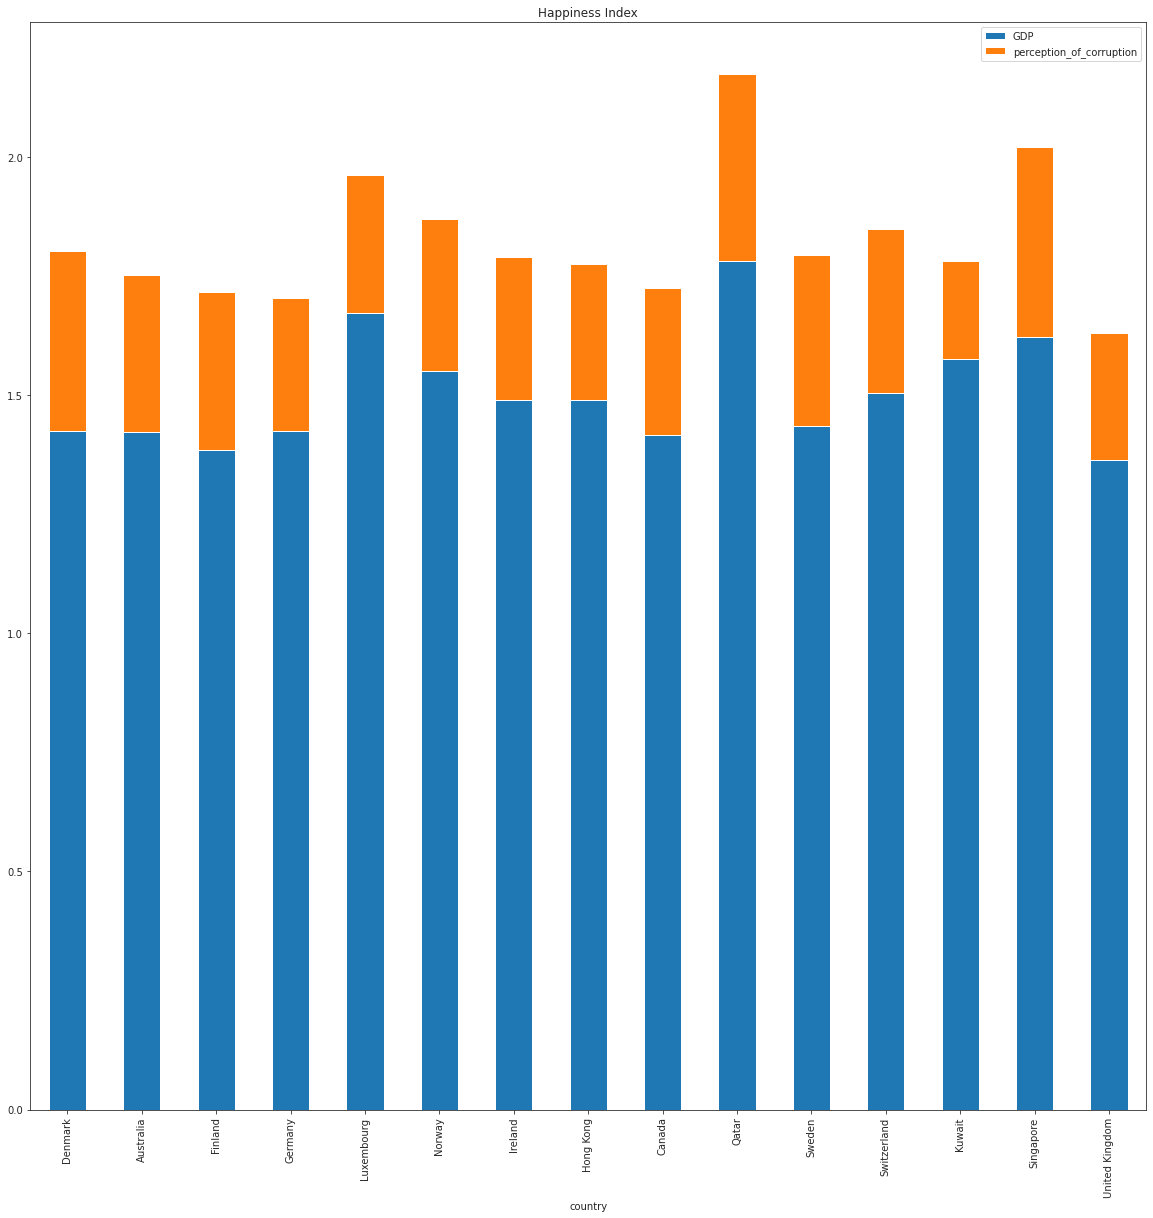

In [ ]:
dff = df.iloc[[35,5,42,46,77,99,60,53,24,108,125,126,70,116,139],[0,2,6]]

dff.plot.bar(x='country', stacked=True, title='Happiness Index', figsize=(20,20))

# **CONCLUSION**
From the final graph above we can conclude that the top five countries where gdp and government trust play a vital role is<br>



1.   Qatar
2.   Singapore
3.   Luxembourg
4.   Norway
5.   Switzerland

# QUESTION 3a


In [ ]:
df2_new

,country,region,happiness score,GDP_16,family/social_support_16,life_expectancy_16,freedom_to_make_choices_16,perception_of_corruption_16,generosity_16,residual_16
0,Afghanistan,Southern Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Central and Eastern Europe,4.655,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Middle East and Northern Africa,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Argentina,Latin America and Caribbean,6.650,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
4,Armenia,Central and Eastern Europe,4.360,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864
...,...,...,...,...,...,...,...,...,...,...
145,Venezuela,Latin America and Caribbean,6.084,1.13367,1.03302,0.61904,0.19847,0.08304,0.04250,2.97468
146,Vietnam,Southeastern Asia,5.061,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
147,Yemen,Middle East and Northern Africa,3.724,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
148,Zambia,Sub-Saharan Africa,4.795,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


In [ ]:
df3_new

,country,region,happiness score,GDP_17,family/social_support_17,life_expectancy_17,freedom_to_make_choices_17,perception_of_corruption_17,generosity_17,residual_17
0,Afghanistan,Southern Asia,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801
1,Albania,Central and Eastern Europe,4.644,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,1.490442
2,Algeria,Middle East and Northern Africa,5.872,1.091864,1.146217,0.617585,0.233336,0.146096,0.069437,2.567604
3,Argentina,Latin America and Caribbean,6.599,1.185295,1.440451,0.695137,0.494519,0.059740,0.109457,2.614005
4,Armenia,Central and Eastern Europe,4.376,0.900597,1.007484,0.637524,0.198303,0.026674,0.083488,1.521499
...,...,...,...,...,...,...,...,...,...,...
145,Venezuela,Latin America and Caribbean,5.250,1.128431,1.431338,0.617144,0.153997,0.064491,0.065020,1.789464
146,Vietnam,Southeastern Asia,5.074,0.788548,1.277491,0.652169,0.571056,0.087633,0.234968,1.462319
147,Yemen,Middle East and Northern Africa,3.593,0.591683,0.935382,0.310081,0.249464,0.056767,0.104125,1.345601
148,Zambia,Sub-Saharan Africa,4.514,0.636407,1.003187,0.257836,0.461603,0.078214,0.249580,1.826705


In [ ]:
df4_new

,country,happiness score,GDP_18,family/social_support_18,life_expectancy_18,freedom_to_make_choices_18,perception_of_corruption_18,generosity_18
0,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036
1,Albania,4.586,0.916,0.817,0.790,0.419,0.149,0.032
2,Algeria,5.295,0.979,1.154,0.687,0.077,0.055,0.135
3,Argentina,6.388,1.073,1.468,0.744,0.570,0.062,0.054
4,Armenia,4.321,0.816,0.990,0.666,0.260,0.077,0.028
...,...,...,...,...,...,...,...,...
145,Venezuela,4.806,0.996,1.469,0.657,0.133,0.056,0.052
146,Vietnam,5.103,0.715,1.365,0.702,0.618,0.177,0.079
147,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
148,Zambia,4.377,0.562,1.047,0.295,0.503,0.221,0.082


In [ ]:
factors=['GDP_16',
       'family/social_support_16', 'life_expectancy_16',
       'freedom_to_make_choices_16', 'perception_of_corruption_16',
       'generosity_16', 'residual_16']

In [ ]:
df2_new

,country,region,happiness score,GDP_16,family/social_support_16,life_expectancy_16,freedom_to_make_choices_16,perception_of_corruption_16,generosity_16,residual_16
0,Afghanistan,Southern Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Central and Eastern Europe,4.655,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Middle East and Northern Africa,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Argentina,Latin America and Caribbean,6.650,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
4,Armenia,Central and Eastern Europe,4.360,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864
...,...,...,...,...,...,...,...,...,...,...
145,Venezuela,Latin America and Caribbean,6.084,1.13367,1.03302,0.61904,0.19847,0.08304,0.04250,2.97468
146,Vietnam,Southeastern Asia,5.061,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
147,Yemen,Middle East and Northern Africa,3.724,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
148,Zambia,Sub-Saharan Africa,4.795,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


In [ ]:
for fact in factors:

    print(f'The mean value of {fact} if {round(df2_new[fact].mean(),2)}\n')

The mean value of GDP_16 if 0.96

The mean value of family/social_support_16 if 0.8

The mean value of life_expectancy_16 if 0.57

The mean value of freedom_to_make_choices_16 if 0.37

The mean value of perception_of_corruption_16 if 0.14

The mean value of generosity_16 if 0.24

The mean value of residual_16 if 2.32



Looking at those values I can assume that the happinesss score will have the highest correlation with GDP, life expecatncy and family support.

In [ ]:
value_list=[[],[],[]]

In [ ]:
new_col=['country','region','happiness score','GDP','family/social_support','life_expectancy_','freedom_to_make_choices','perception_of_corruption']
df2_comp=df2_new.rename(columns=dict(zip(df2_new.columns,new_col)),inplace=True)
df3_comp=df3_new.rename(columns=dict(zip(df3_new.columns,new_col)),inplace=True)
df4_comp=df4_new.rename(columns=dict(zip(df4_new.columns,new_col)),inplace=True)

In [ ]:
df2_new

,country,region,happiness score,GDP,family/social_support,life_expectancy_,freedom_to_make_choices,perception_of_corruption,generosity_16,residual_16
0,Afghanistan,Southern Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Central and Eastern Europe,4.655,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Middle East and Northern Africa,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Argentina,Latin America and Caribbean,6.650,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
4,Armenia,Central and Eastern Europe,4.360,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864
...,...,...,...,...,...,...,...,...,...,...
145,Venezuela,Latin America and Caribbean,6.084,1.13367,1.03302,0.61904,0.19847,0.08304,0.04250,2.97468
146,Vietnam,Southeastern Asia,5.061,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
147,Yemen,Middle East and Northern Africa,3.724,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
148,Zambia,Sub-Saharan Africa,4.795,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


In [ ]:
df4_new

,country,region,happiness score,GDP,family/social_support,life_expectancy_,freedom_to_make_choices,perception_of_corruption
0,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036
1,Albania,4.586,0.916,0.817,0.790,0.419,0.149,0.032
2,Algeria,5.295,0.979,1.154,0.687,0.077,0.055,0.135
3,Argentina,6.388,1.073,1.468,0.744,0.570,0.062,0.054
4,Armenia,4.321,0.816,0.990,0.666,0.260,0.077,0.028
...,...,...,...,...,...,...,...,...
145,Venezuela,4.806,0.996,1.469,0.657,0.133,0.056,0.052
146,Vietnam,5.103,0.715,1.365,0.702,0.618,0.177,0.079
147,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
148,Zambia,4.377,0.562,1.047,0.295,0.503,0.221,0.082


In [ ]:
factors_new=['GDP','family/social_support','life_expectancy_','freedom_to_make_choices','perception_of_corruption']
frames=[df2_new,df3_new,df4_new]
for i,frame in enumerate(frames):
    for fact in factors_new:
        value_list[i].append(frame[fact].mean())

In [ ]:
value_list

[[0.9640916666666666,
  0.7956282000000005,
  0.5659864666666666,
  0.3745498666666667,
  0.13597326666666668],
 [1.0023869968826573,
  1.199332897265752,
  0.566610697961102,
  0.41469690334051845,
  0.1237931349594146],
 [1.2249933333333336,
  0.6126800000000001,
  0.46001333333333333,
  0.18169333333333332,
  0.11231543624161076]]

In [ ]:
df_cons=pd.DataFrame(data=np.array([df2_new.country,df2_new['happiness score'],df3_new['happiness score'],
                                  df4_new['happiness score']]).transpose(),index=df2_new.index,
                            columns=['country','score_16','score_17','score_18'])

In [ ]:
df_cons.head()

,country,score_16,score_17,score_18
0,Afghanistan,3.36,3.794,0.332
1,Albania,4.655,4.644,0.916
2,Algeria,6.355,5.872,0.979
3,Argentina,6.65,6.599,1.073
4,Armenia,4.36,4.376,0.816


Now, we are calculating the consistency percent to plot a graph and determine consistency rate of different countries to determine which country has consistent Happiness Score over the years.

In [ ]:
#Calculating the consistency in Happiness Score through formula
df_cons['consistent']=abs(df_cons['score_16']-df_cons['score_17'])-abs(df_cons['score_17']-df_cons['score_18'])
df_cons['consistent'] =df_cons['consistent'].abs()
df_cons['consistent']=(1-df_cons['consistent'])*100

In [ ]:
df_cons.sort_values("consistent", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
df_cons

,country,score_16,score_17,score_18,consistent
128,Syria,3.069,3.462,0.689,-138.0
17,Botswana,3.974,3.766,1.017,-154.100006
131,Tanzania,3.666,3.349,0.455,-157.699995
21,Burundi,2.905,2.905,0.091,-181.399994
51,Haiti,4.028,3.603,0.315,-186.299985
...,...,...,...,...,...
127,Switzerland,7.509,7.494,1.42,-505.899992
31,Costa Rica,7.087,7.079,1.01,-506.099999
42,Finland,7.413,7.469,1.305,-510.8
55,Iceland,7.501,7.504,1.343,-515.8


<function matplotlib.pyplot.show>

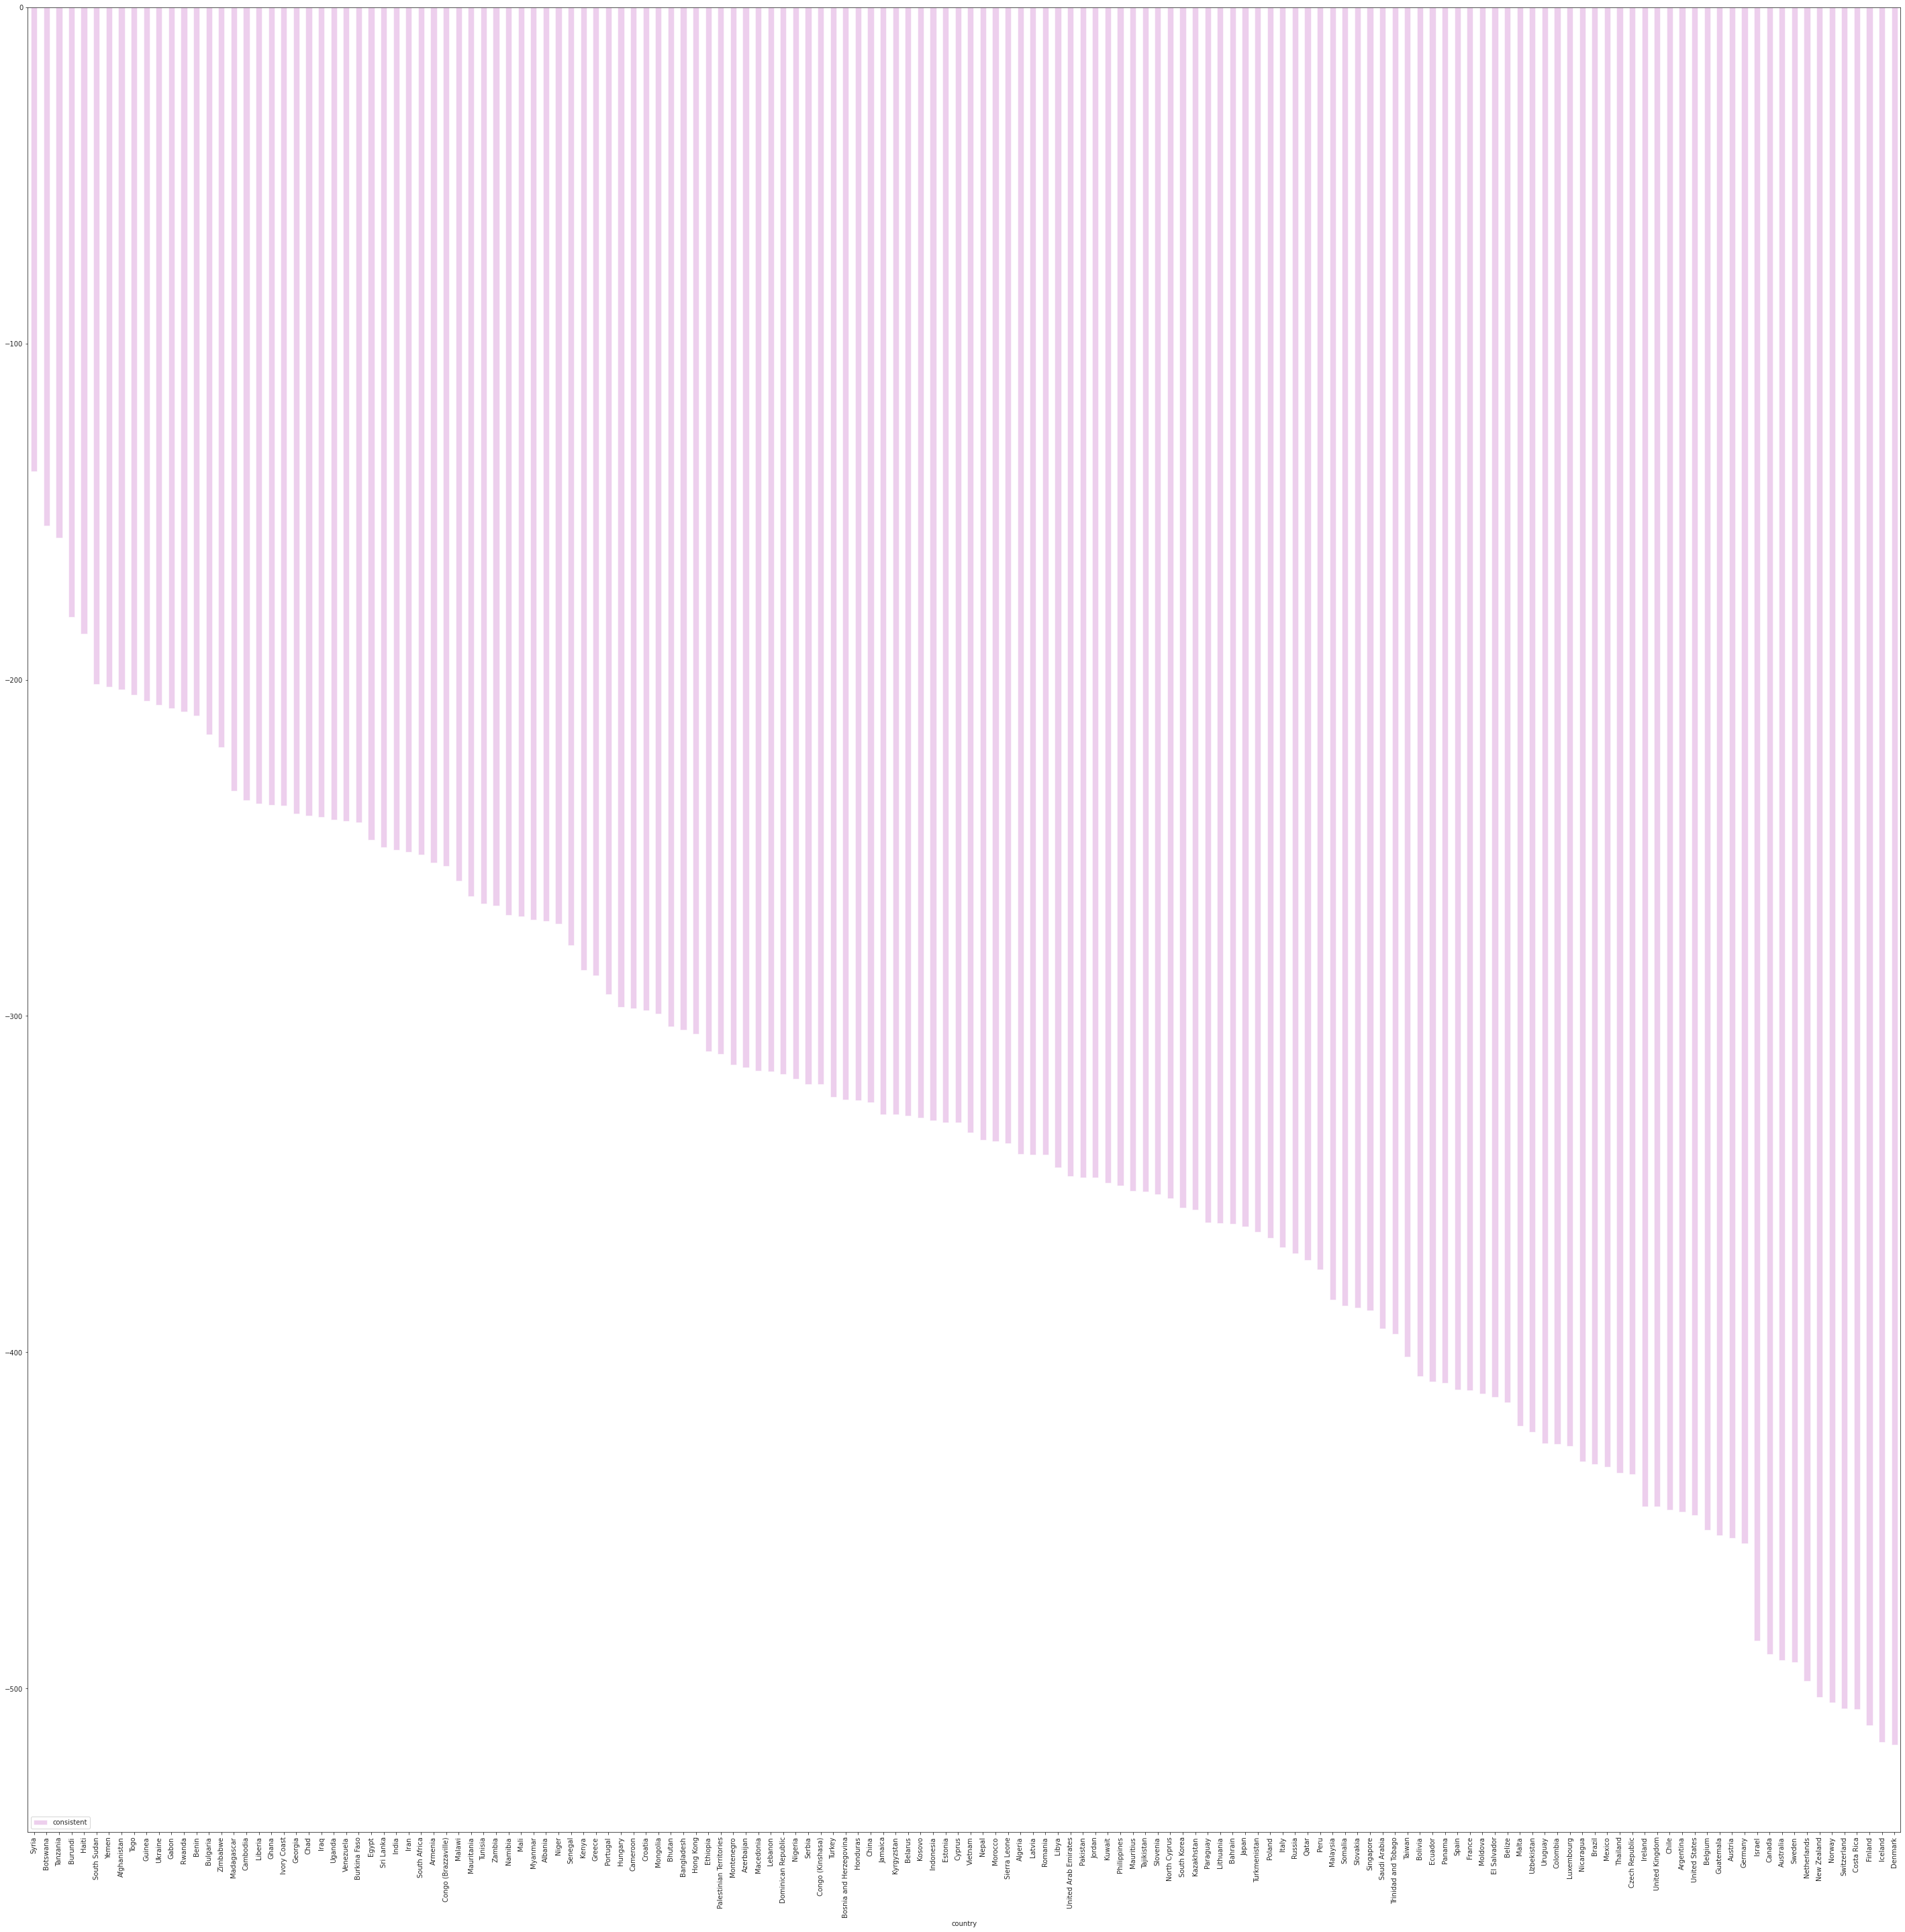

In [ ]:
#Plotting consistency graph
df_cons.plot(x='country',y='consistent',kind='bar',figsize=(50,50),color='plum',alpha=0.5)
pl.show

# **CONCLUSION**
From the above graph the countries with consistent HI are the ones that are close to hundred percent, those include Belize,Burundi,Qatar and China

# QUESTION 3b

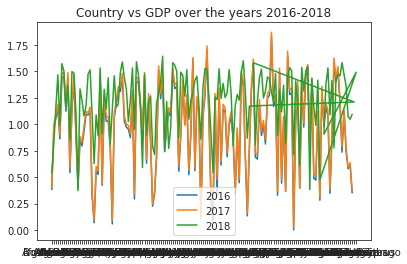

In [ ]:
fig = pl.figure()

for frame in [df2_new,df3_new,df4_new]:
    pl.title('Country vs GDP over the years 2016-2018')
    pl.plot(frame['country'], frame['GDP'])
    pl.legend(labels=['2016','2017','2018'])

pl.show()

# CONCLUSION
Countries with lines close together have parameters mostly consistent with time.<br>
So, GDP is relatively consistent compared to others.

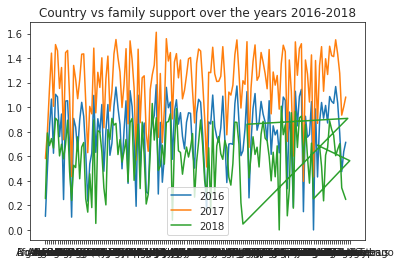

In [ ]:
fig = pl.figure()

for frame in [df2_new,df3_new,df4_new]:
    # pl.figure(figsize = (10,10))
    pl.title('Country vs family support over the years 2016-2018')
    pl.plot(frame['country'], frame['family/social_support'])
    pl.legend(labels=['2016','2017','2018'])

pl.show()

# CONCLUSION
We can see that Family support has a huge variance over the years in deciding Happiness Score.

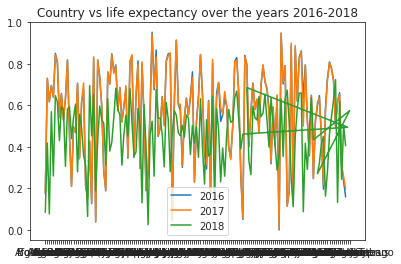

In [ ]:
fig = pl.figure()

for frame in [df2_new,df3_new,df4_new]:
    # pl.figure(figsize = (10,10))
    pl.title('Country vs life expectancy over the years 2016-2018')
    pl.plot(frame['country'], frame['life_expectancy_'])
    pl.legend(labels=['2016','2017','2018'])

pl.show()

# CONCLUSION
Countries with lines close together have parameters mostly consistent with time.<br>
So, Life expectancy is relatively consistent compared to others.

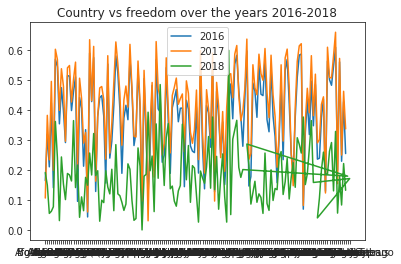

In [ ]:
fig = pl.figure()

for frame in [df2_new,df3_new,df4_new]:
    # pl.figure(figsize = (10,10))
    pl.title('Country vs freedom over the years 2016-2018')
    pl.plot(frame['country'], frame['freedom_to_make_choices'])
    pl.legend(labels=['2016','2017','2018'])

pl.show()

# CONCLUSION
Freedom varies a lot over the years but we can see that it doesnt vary too much over 2016 and 2017.

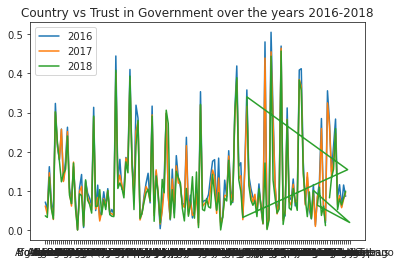

In [ ]:
fig = pl.figure()

for frame in [df2_new,df3_new,df4_new]:
    # pl.figure(figsize = (10,10))
    pl.title('Country vs Trust in Government over the years 2016-2018')
    pl.plot(frame['country'], frame['perception_of_corruption'])
    pl.legend(labels=['2016','2017','2018'])

pl.show()

# CONCLUSION
Trust in Government is very consistent over the years in deciding Happiness Score.

# **FINAL CONCLUSION**
# Round 1
First, we cleaned the data and dropped columns we might not need. We started by taking the 2017 dataset. <br>
Then we used different visualisation techniques to come up with inferences from the dataset.

---


# Round 2
We considered the 2016 dataset for this purpose and used PCA to come up with the columns which affected the Happiness Score the most.

---


# Round 3
First we extracted the datasets for years 2016, 2017, 2018 and 2019. <br>
Then we made a combined dataframe merging data from 2016, 2017, 2018, 2019 and coming with average of values in countries for all columns. <br>

Q1. Then we made a linear regression model to predict the Happiness Score when all the other parameters are given. <br>
Q2. We found out which have high Happiness Index in terms of GDP and Trust in government. <br>
Q3a. We found out which county had a consistent Happiness Score over the years. <br>
Q3b. We found out which parameters vary largely with time.

---



